# Projekt 6: Klassifizierung mit einem Künstlichen Neuronalen Netz

Nachdem die Daten soweit wie nötig bereinigt und normalisiert wurden, erstellen Sie bspw. ein neuronales Netz zur Klassifizierung der einzelnen Gegenstände. 
Orientieren sich die an der mlcourse22.git Übung 7. Sie können auch andere Hilfsmittel bzw. Informationen nutzen.
Wenn Sie möchten, können Sie auch andere Klassifikationen anstatt eines neuronalen Netzes nehmen. Die Folgenden Übungen beziehen sich jedoch auf die Implementierung neuronaler Netze.
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Neural_network.svg/1200px-Neural_network.svg.png" width="500"/>
</div>
Das Bild zeigt schematisch ein neuronales Netz mit einem Input-Layer, einem Hidden-Layer und einem Output-Layer.
Der Input-Layer besitzt dabei zwei Neuronen. Der Hidden-Layer ist als Fullyconnected-Layer definiert und verbindet jeweils seine fünf Neuronen mit den jeweiligen zwei Input Neuronen und dem einzelnen Output Neuron.


## Übung 1: Vorbereitung der Daten

<h4>Zur weiteren Bearbeitung müssen ihre bereits bereinigten Daten (siehe Übung 5) aufgeteilt werden. Bei einem Supervised Learning Ansatz müssen sie gleichzeitig die dazugehörigen Labels definieren.</h4>
<ul>
<li>Erstellen Sie einen Datensatz mit Trainings und Testdaten (x_train,y_test) sowie den Zielwerten (y_train,y_test)</li>
<li>Wie müssen die Zielwerte für eine Klassifizierung definiert werden?</li>
<li>Wie teilen sie die Daten auf? Wie groß ist ihr Verhältnis zu Test -und Trainingsdaten?</li>
</ul>

## Übung 2: Progammierung Ihres Klassifikators

<h4> Progammierung Sie Klassifikator. Neben neuronalen Netzen gibt es auch weitere Klassifikationsmodelle, wie k-nearest neighbor oder eine SVM. Für diese Übung können sie einen Klassifikator Ihrer Wahl nutzen. Die folgenden Fragen beziehen sich jedoch auf die Probleme für neuronale Netze. </h4>
<ul>
    <li>Überlegen Sie sich welche Arichtektur Ihr neuronales Netz haben soll?</li>
    <ul>
        <li>Informieren sie sich welche Typen von Layern es gibt!</li>
        <li>Welcher Layer ist für ihr Problem Sinnvoll?</li>
    </ul>
    <li>Wie viele Neuronen besitzt der Input -und Output layer?</li>
    <li>Definieren sie die Aktivierungs -und Verlustfuntkionen</li>
    <ul>
        <li>Informieren sie sich welche Aktivierungs -und Verlustfuntkionen es gibt!</li>
        <li>Überlegen Sie sich, welchen Unterschied sie bei Veränderung der Verlustfunktion erhalten</li>
        <li>Überlegen Sie sich, welchen Unterschied sie bei Veränderung der Aktivierungsfunktion erhalten</li>
    </ul>
</ul>

## Übung 3: Auswertung

<h4> Werten Sie ihre Ergebnisse aus. Versuchen sie ihren Trainingsverlauf und ihr Model zu speichern und zu visualisieren. </h4>
<ul>   
    <li>Werten Sie die ersten Ergebnisse aus! Was fällt ihnen auf?</li>
    <li>Wenn möglich stellen Sie ihre Ergebniss grafisch dar</li>
    <li>Stellen Sie den Trainingsverlauf in einem geeigneten Plot dar</li>
    <li>Wie hoch ist ihr Loss und ihre Accuracy?</li>
    <li>Überlegen Sie sich möglichkeiten die Performance zu steigern</li>
</ul>

## Übung 4: Testen

<h4> Testen sie ihren Klassifikator mit einem neuen Datensatz. Scannen Sie dafür eines Ihrer Objekte erneut ein und analysieren die Daten.</h4>
<ul>   
    <li>Wird das Objekt richtig definiert?</li>
    <li>Wenn nicht, was könnten mögliche Probleme sein?</li>
    </ul>

## Beispiel anhand des MNIST Datasets
<p style="font-size: 12px"> MNIST Dataset Siehe: http://yann.lecun.com/exdb/mnist/</p>

<h4> MNIST Daten laden</h4>

In [1]:
# Laden der benötigten Bibliotheken
import tensorflow as tf
import keras
from keras.datasets import mnist
# Laden der Trainings und Testdaten aus dem mnist Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

2022-12-08 12:16:49.464086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 12:16:49.464164: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<h4>Darstellung der Bilder</h4>

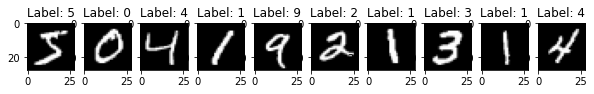

In [2]:
# Laden der benötigten Bibliotheken
import matplotlib.pyplot as plt
# Anzahl der angezeigten Bilder definieren
num_row=10
num_col=1
num_images=(num_row*num_col)
# Zufällige Bilder entnehmen
images = x_train[:num_images]
labels = y_train[:num_images]
# Bilder plotten
fig, axes = plt.subplots(num_row, num_col, figsize=(10,10))
for i in range(num_images):
    ax = plt.subplot(1, 10, i + 1)
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.show()

<h4> Bilder Vorbearbeiten </h4>

In [3]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255 
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

<h4> Label One-Hot-Encoden </h4>

In [7]:
# Laden der benötigten Bibliotheken
from tensorflow.keras.utils import to_categorical
# Bilder One-Hot-Encoden
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

<h3> Aufbau neuronales Netz <h3>

In [5]:
# Laden der benötigten Bibliotheken
from keras import models
from keras import layers
from keras import regularizers
# Neuronales Netz mit verschiedenen Layern erstellen
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, kernel_regularizer = regularizers.l2(0.007), activation='relu'))
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(10 , activation='softmax'))
# Kompilieren
model.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
# Zusammenfassunf
model.summary()

2022-12-08 12:17:13.765789: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 12:17:13.765859: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 12:17:13.765949: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mltljh): /proc/driver/nvidia/version does not exist
2022-12-08 12:17:13.767292: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 16)         0

<h3> Das Modell trainieren </h3>

In [9]:
# Laden der benötigten Bibliotheken
import time
# Messen der Trainingszeit
start = time.time()
# Trainingsstart
history = model.fit(
    x_train, y_train,
    epochs= 15,
    batch_size= 64,
    shuffle = True,
    validation_split = 0.2
)
print("It took:", time.time() - start)

Epoch 1/15
844/844 [==============================] - 37s 44ms/step - loss: 0.4324 - accuracy: 0.9161 - val_loss: 0.1853 - val_accuracy: 0.9685
Epoch 2/15
844/844 [==============================] - 36s 43ms/step - loss: 0.2339 - accuracy: 0.9458 - val_loss: 0.1128 - val_accuracy: 0.9793
Epoch 3/15
844/844 [==============================] - 36s 43ms/step - loss: 0.1876 - accuracy: 0.9542 - val_loss: 0.1060 - val_accuracy: 0.9805
Epoch 4/15
844/844 [==============================] - 36s 43ms/step - loss: 0.1663 - accuracy: 0.9594 - val_loss: 0.0973 - val_accuracy: 0.9795
Epoch 5/15
844/844 [==============================] - 36s 42ms/step - loss: 0.1501 - accuracy: 0.9630 - val_loss: 0.0855 - val_accuracy: 0.9825
Epoch 6/15
844/844 [==============================] - 36s 42ms/step - loss: 0.1414 - accuracy: 0.9651 - val_loss: 0.0745 - val_accuracy: 0.9878
Epoch 7/15
844/844 [==============================] - 36s 43ms/step - loss: 0.1311 - accuracy: 0.9676 - val_loss: 0.0725 - val_accuracy:

<h4>Visualisierung der Ergebnisse</h4>

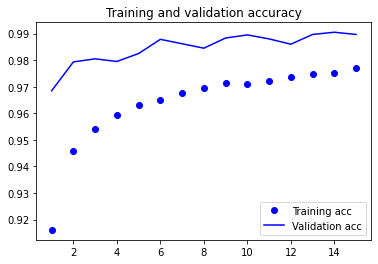

Abb 1: Anstieg der Genauigkeit über die Epochen



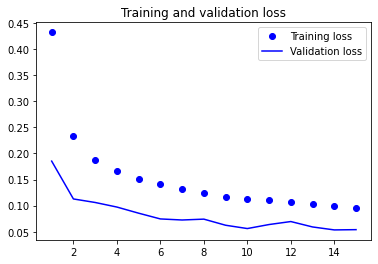

Abb 2: Abnahme des Fehlers über die Epochen



In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
print("Abb 1: Anstieg der Genauigkeit über die Epochen")
print("")
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print("Abb 2: Abnahme des Fehlers über die Epochen")
print("")